In [2]:
import pandas as pd

df = pd.read_csv('results_final.csv')

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(17.7,8.27)})

def plot_stacked(df):
    splot = sns.barplot(x="alpha", y="mse", hue="algo", data=df)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()+0.3), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    plt.xlabel("alpha", size=14)
    plt.ylabel("MSE", size=14)

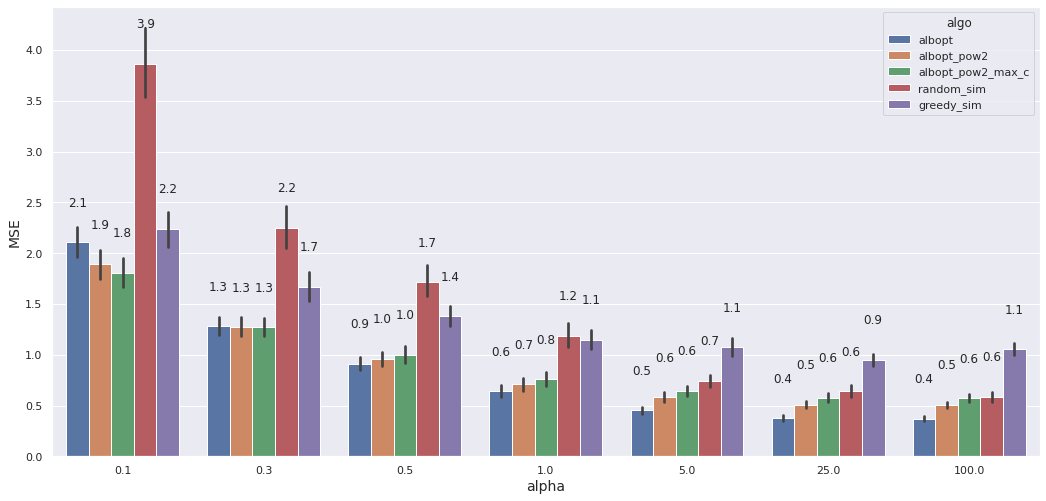

In [4]:
plot_stacked(df[df['dataset'] == 'places'])

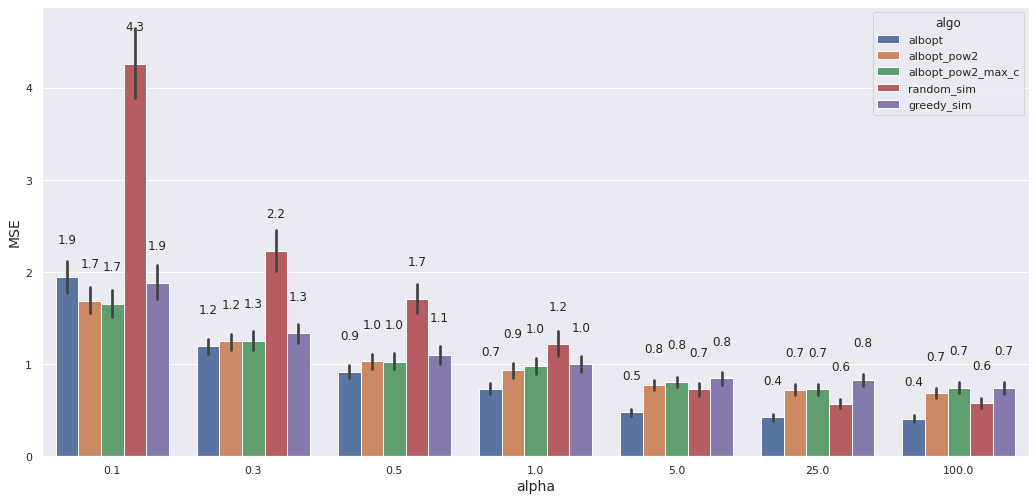

In [5]:
plot_stacked(df[df['dataset'] == 'people'])

In [6]:
ranks = [
    'CDBEA',
    'EADCB',
    'EBACD',
    'CBAED',
    'BCADE',
]

ranks_res = []

m2a = {
   'A': 'albopt',
   'B': 'albopt_pow2',
   'C': 'albopt_pow2_max_c',
   'D': 'random_sim',
   'E': 'greedy_sim',
}

for r in ranks:
    ranks_res.append({m2a[i]: b for b,i in enumerate(r, start=1)})
ranks_df = pd.DataFrame(ranks_res)
ranks_df

,albopt_pow2_max_c,random_sim,albopt_pow2,greedy_sim,albopt
0,1,2,3,4,5
1,4,3,5,1,2
2,4,5,2,1,3
3,1,5,2,4,3
4,2,4,1,5,3


In [7]:
ranks_df.mean()

albopt_pow2_max_c    2.4
random_sim           3.8
albopt_pow2          2.6
greedy_sim           3.0
albopt               3.2
dtype: float64